<div style="text-align: left;"><h1 style="color: #00205b; font-family: 'Georgia';">How Predictive Models Help British Airways Acquire Customers</h1>
<p style="font-size: small;">Author: Simontagbor</p>
<p style="font-size: small;">Last updated: 2024-01-16 </p>
</div>

---


<div style="text-align: center;">
<a href="https://github.com/Simontagbor" style="text-decoration: none; color: black; font-size: larger; margin-right: 20px;">
<img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" height="35" style="vertical-align: middle; margin-right: 10px;">
</a>
<a href="https://www.kaggle.com/simontagbor" style="text-decoration: none; color: black; font-size: larger;">
<img src="https://www.kaggle.com/static/images/site-logo.png" height="30" style="vertical-align: middle; margin-right: 10px;">
</a>
</div>


---

> This project is about combating the problem of unstable buying cycle of British Airways customers using the power of predictive modeling. 
> The project was done as part of a job simulation as a Junior Data Scientist at British Airways.
> <p>In this Interactive Notebook I will show how I trained a predictive model with Random Forest on 5000 entries for customer booking data from British Airways.</p>
>  
> <p>The goal is to help British Airways acquire customers before the holidays.</p>
> <p>The project is divided into 4 parts:</p>
><ol>
>    <li>Exploratory Data Analysis</li>
>    <li>Data Cleaning and Preparation</li>
>    <li>Feature Engineering</li>
>    <li>Modeling and Evaluation</li>
></ol>
> The source code for this project can be found at my [github](https://github.com/Simontagbor/BritishAirways-predictive-ML) page. 
><p> You can also find the  Jupyter notebook and the dataset on my <a href="https://www.kaggle.com/simontagbor/british-airways-predictive-ml">kaggle page</a>.</p>




<h2>Project Overview</h2>

<em>For this project I completed the following tasks:</em>

- [x] Performed Exploratory Data Analysis.
- [x] Cleaned and Prepared the data for modeling.
- [x] Performed Feature Engineering.
- [x] Built and Evaluated models.
- [x] Test the model on unseen data.
- [x] Interpret the model results and make predictions.


<h2>Project  Dependencies</h2>

In [1]:
# import project libraries
import pandas as pd
import numpy as np # for linear algebra
import math # for math operations 

import seaborn as sns # for plotting

# handling files
import os 
import sys 


# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt # for plotting
import squarify # for tree maps


<h2> Exploratory Data Analysis</h2>

<p>To understand the data, I performed exploratory data analysis. I used the following techniques to understand the data:</p>

- [x] Visual inspection of data.
- [x] Exploratory Data Visualizations.(Univariate, Bivariate and Multivariate analysis)


<h3>Visual Inspection of Data</h3>

In [2]:
df = pd.read_csv("predictive_model_data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The dataframe object has  a `.head()` method that allows us to view a specified number of rows in the dataset. This method came in handy for visual inspection of the dataset and to get a feel of the data.

In [3]:
# retrieve a summarised info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The summary on the columns indicates that there are:
<ul>
<li><strong>14 unique columns</strong></li>
<li><strong>5000 rows</strong></li>
<li><strong>Zero null values (which is good!)</strong></li>
<li><strong>Three unique data types (int64, float64 and object)</strong></li>
</ul>

Here is a more detailed data description, explaining exactly what each column means:
<details>
<summary>Click to expand!</summary>
<ul>
  <li><code>num_passengers</code> = the number of passengers associated with a particular flight booking.</li>
  <li><code>sales_channel</code> = indicates the channel through which the flight booking was made.</li>
  <li><code>trip_type</code> = indicates the trip Type (Round Trip, One Way, Circle Trip)</li>
  <li><code>purchase_lead</code> = the number of days between travel date and booking date</li>
  <li><code>length_of_stay</code> = the number of days spent at destination</li>
  <li><code>flight_hour</code> = represents the scheduled departure or arrival time of the flight</li>
  <li><code>flight_day</code> = day of week of flight departure</li>
  <li><code>route</code> = origin -> represents the destination flight route</li>
  <li><code>booking_origin</code> = shows the country from where booking was made</li>
  <li><code>wants_extra_baggage</code> = indicates if the customer wanted extra baggage in the booking</li>
  <li><code>wants_preferred_seat</code> = indicates if the customer wanted a preferred seat in the booking</li>
  <li><code>wants_in_flight_meals</code> = if the customer wanted in-flight meals in the booking</li>
  <li><code>flight_duration</code> = shows the total duration of flight (in hours)</li>
  <li><code>booking_complete</code> = indicates if the customer completed the booking</li>
</ul>
</details>

Considering the unique data types, I decided to perform **label encoding** to convert the categorical variables to numerical variables. converting categorical variables to numerical representations will allow me to use machine learning algorithms effectively.

<p>In our case the ideal candidate for label encoding is: <code>flight_day</code>. this is because it is currently a nominal variable with no order or hierarchy.</p>


In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

 
<p>As can be seen the current days of the week have no order or hierarchy.</p>
<p>To encode this variable I will map the days of the week to the following numerical representations:</p> 

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

# set the new values
df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

As can be seen the `fligt_days` column has been successfully encoded.

<h3>Summary Statistics</h3>

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


<h4>Some Highlights from The summary statistics</h4>

1. The majority of bookings involve a small ` number of passengers `, with 75% of the bookings having either 1 or 2 passengers. However, there are cases with up to 9 passengers.

2. The average ` purchase lead ` time is approximately 85 days, indicating that customers typically book flights well in advance of their travel dates. Inferring from the significant difference between the mean and the median(50th percentile) the distribution is positively-skewed. The predictive model will be trained with ` Random Forest ` Algorithm so it is important to note that this algorithm is not sensitive to outliers.

3. It's also interesting to point out that the average ` length of stay ` is approximately 23 days, indicating that customers typically stay at their destination for a short period of time. However, the maximum length of stay is 778 days, suggesting some outliers or potentially long-term bookings.

<h4>Checking for Missing Values</h4>

In [8]:
### Check for Nmissing values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

<h3>Exploratory Visualizations of the data</h3>
I perfomed further exploratory data analysis using visualizations. I used the following techniques to understand the data:

- [x] Univariate Analysis
- [x] Bivariate Analysis
- [x] Multivariate Analysis

<h4> Univariate analysis</h4>
My goal for this initial step was to understand the distribution of each variable in the dataset. I used the following techniques to understand the distribution:

- [x] distribution plots

hopefully, patterns and outliers would emerge from this analysis that would help me understand the data better.

- `num_passengers`
- `purchase_lead`
- `flight_day`
- `Sales_channel`
- `trip_type`

I examined the above selected variables in the dataset using distribution plots. The plots below show the distribution of the following variables:

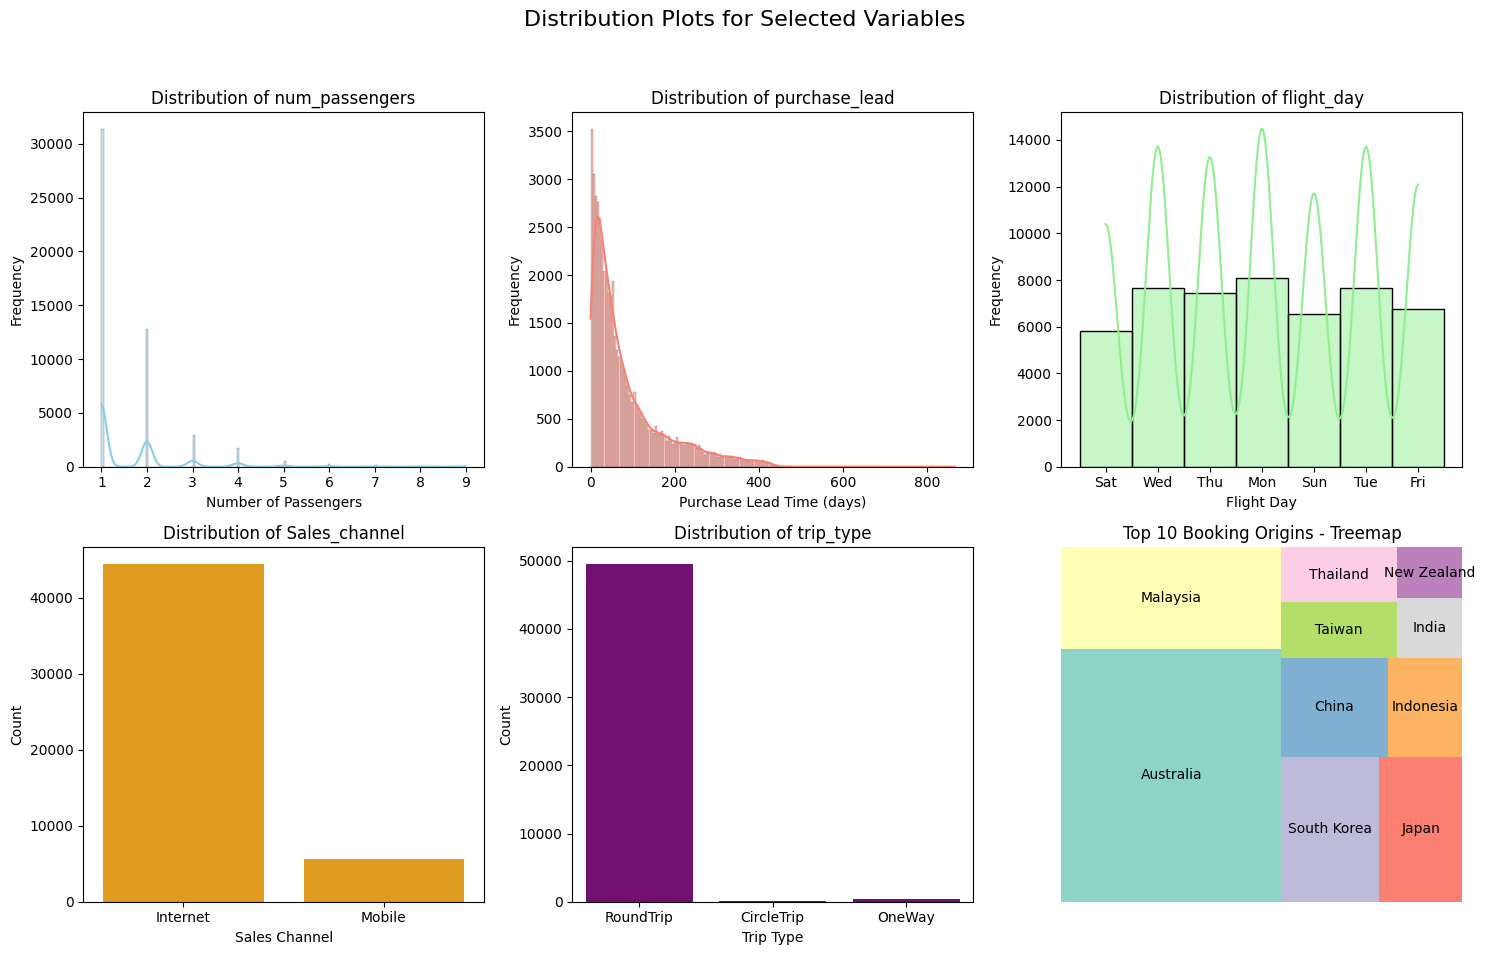

In [9]:
# Convert numeric weekday to corresponding day names
weekday_mapping = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}
df['flight_day'] = df['flight_day'].map(weekday_mapping)

# Set up the grid layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Distribution Plots for Selected Variables', fontsize=16)


# Plotting num_passengers
sns.histplot(data=df, x='num_passengers', kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of num_passengers')
axes[0, 0].set_xlabel('Number of Passengers')
axes[0, 0].set_ylabel('Frequency')

# Plotting purchase_lead
sns.histplot(data=df, x='purchase_lead', kde=True, color='salmon', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of purchase_lead')
axes[0, 1].set_xlabel('Purchase Lead Time (days)')
axes[0, 1].set_ylabel('Frequency')

# Plotting flight_day with day labels
sns.histplot(data=df, x='flight_day', kde=True, color='lightgreen', ax=axes[0, 2])
axes[0, 2].set_title('Distribution of flight_day')
axes[0, 2].set_xlabel('Flight Day')
axes[0, 2].set_ylabel('Frequency')

# Plotting Sales_channel
sns.countplot(data=df, x='sales_channel', color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Sales_channel')
axes[1, 0].set_xlabel('Sales Channel')
axes[1, 0].set_ylabel('Count')

# Plotting trip_type
sns.countplot(data=df, x='trip_type', color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of trip_type')
axes[1, 1].set_xlabel('Trip Type')
axes[1, 1].set_ylabel('Count')

# Adding the treemap for booking_origin (top 10 countries only)
top_10_origin_counts = df['booking_origin'].value_counts().nlargest(10)
axes[1, 2].axis('off')  # Turn off axis for treemap
squarify.plot(sizes=top_10_origin_counts, label=top_10_origin_counts.index, color=sns.color_palette("Set3"), ax=axes[1, 2])

# Adding title to the treemap
axes[1, 2].set_title('Top 10 Booking Origins - Treemap')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

Checkpoint. Check back later for more updates.

last updated: 2024-01-16